# Modelado de Intercambio Aleatorio de Activos (RAE) - Tercera parte

En este trabajo se realizan más simulaciones RAE, ahora con modelos de intercambio cinético que son diferentes a los modelos con ahorro.

## Introducción

Los modelos de intercambio binario en los que la cantidad de riqueza transferida es proporcional a la riqueza del perdedor, como la mayoría de las reglas de intercambio estudiadas en [Dragulescu & Yakovenko (2000)](https://doi.org/10.1007/s100510070114), se conocen comúnmente como **modelos de "robo y fraude" (TF, *theft and fraud*)**. En contraste, aquellos en los que la cantidad de riqueza transferida es proporcional a la riqueza del agente más pobre involucrado en un intercambio dado se conocen como modelos de **"venta de garaje" (YS, *yard sale*)**. 

La ventaja de los modelos de tipo YS sobre los de tipo TF es que, desde una perspectiva estratégica, los agentes no se ven desincentivados a participar en el comercio, ya que el valor esperado de un intercambio siempre es cero. Esto contrasta con el modelo TF, que se llama así precisamente porque el valor esperado de un intercambio siempre es negativo para el agente más rico. Si se permitiera a los agentes neutrales al riesgo elegir si participar o no en un determinado intercambio, una economía TF se congelaría inmediatamente en cuanto apareciera un diferencial de riqueza. El principal inconveniente de los modelos de tipo YS es que, al no ser modificados, siempre dan como resultado la condensación de la riqueza en manos de un pequeño número de agentes, como se verá a continuación.

Los modelos de tipo YS fueron estudiados por primera vez por [Chakraborti (2002)](https://www.worldscientific.com/doi/abs/10.1142/S0129183102003905), quien simuló un ensamble que se describe a continuación.

## Primer modelo YS

### Descripción del modelo

En este nuevo modelo de transacción binaria, asumimos que ambos agentes económicos elegidos al azar $i$ y $j$ invierten la misma cantidad de dinero $m_{min} = \textrm{min}\left\{ m_{i},m_{j} \right\}$, el dinero mínimo entre los agentes. Por lo tanto, $2m_{min}$ es el dinero real que está disponible en el mercado para intercambiar al azar, y el intercambio se puede describir como

$$
m_i \longrightarrow m'_i = \left( m_{i}-m_{min} \right)+2 \epsilon m_{min} \\
m_j \longrightarrow m'_j = \left( m_{j}-m_{min} \right)+2 \left( 1-\epsilon \right) m_{min}
$$

Donde $\epsilon$ es una variable aleatoria uniforme entre 0 y 1. De aquí se deduce que la regla de intercambio es 

$$
\Delta m = m_i - m'_i = \alpha m_{min}
$$

con $\alpha = 1-2\epsilon$ una fracción aleatoria cuyo valor absoluto es menor a 1, es decir, $-1 < \alpha < 1$

### Simulaciones

Los parámetros para una simulación serán $N = 5 \times 10^{4}$ y $M = 5 \times 10^{6}$. Por lo tanto, al principio de las simulaciones, los agentes contarán con la misma cantidad de dinero $\left\langle m \right\rangle = \frac{M}{N} = 100$.

Además, en esta simulación se eligirá un agente al azar para ver cómo evoluciona su serie temporal de dinero.

In [14]:
from economic_agent import Agent_YS1st
from random import randint,choice
import matplotlib.pyplot as plt
import numpy as np

In [15]:
# Parámetros
Nexp = 4
N = int(5*10**Nexp) # número de agentes

Mexp = 6
M = 5*10**Mexp # cantidad total de dinero en el sistema

T = M/N # temperatura de dinero

texp = 6 # Se recomienda 5
t_steps = int(4*10**texp) # Pasos de tiempo para la simulación

In [16]:
# Se crean a los agentes
agents_list = [Agent_YS1st(money=T) for i in range(N)] # Todos los agentes tienen la misma cantidad de dinero
chosen_agent_idx = choice(range(N)) # índice del agente elegido para ver cómo evoluciona su serie temporal de dinero
# Simulación
for i in range(t_steps):
    agent_i_index = randint(0,N-1)
    agent_j_index = randint(0,N-1) # se elige un par de agentes al azar para hacer transacción
    coin_flip = randint(0,1)
    loser_index = [agent_i_index,agent_j_index][coin_flip] # Uno de los agentes se selecciona al azar como el perdedor
    winner_index = [agent_i_index, agent_j_index][1-coin_flip]
    # El perdedor le paga al ganador
    agents_list[loser_index].pay(payee=agents_list[winner_index])

    agents_list[chosen_agent_idx].observe_money() # Se registra la cantidad de dinero del agente elegido en su serie temporal

In [18]:
# Datos para el histograma
final_m_array = np.array([agent.money for agent in agents_list])
nb_bins = int(max(final_m_array))

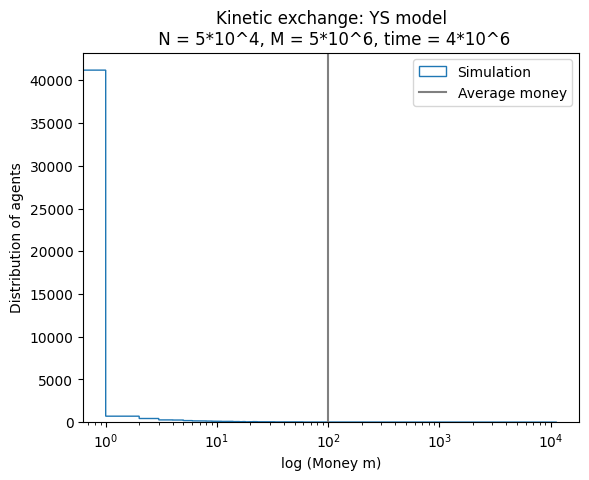

In [19]:
plt.hist(final_m_array, bins=range(nb_bins+2), density=False, label="Simulation", histtype='step')
plt.axvline(x=T, color = 'gray', label='Average money')
plt.title(f"Kinetic exchange: YS model\n N = 5*10^{Nexp}, M = 5*10^{Mexp}, time = 4*10^{texp}")
plt.xlabel("log (Money m)")
plt.ylabel("Distribution of agents")
plt.xscale('log')
#plt.yscale('log')
plt.legend()
plt.show()

Podemos ver que, después de un gran número de transacciones, una fracción minúscula de agentes terminan como "oligarcas" que poseen prácticamente toda la riqueza de la economía simulada, y el resto terminan con prácticamente nada. Para apreciar mejor este resultado, grafiquemos la distribución acumulada,

In [20]:
nb_points = 100
bins = np.logspace(np.log10(min(final_m_array)), np.log10(max(final_m_array)), nb_points)
money_hist = np.histogram(final_m_array, bins=bins, density=True)
x,y = money_hist[1][:-1],money_hist[0]/np.sum(money_hist[0])
y = N*y.cumsum() # Histograma acumulativo

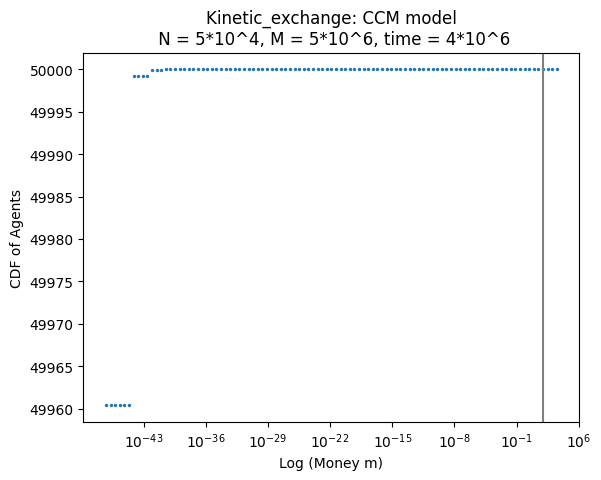

In [21]:
plt.scatter(x,y, s=2.0)
plt.axvline(x=T, color = 'gray', label='Average money')
plt.xlabel("Log (Money m)")
plt.ylabel("CDF of Agents")
plt.xscale("log")
#plt.yscale("log")
plt.title(f"Kinetic_exchange: CCM model\n N = 5*10^{Nexp}, M = 5*10^{Mexp}, time = 4*10^{texp}")
plt.show()

Aquí vemos que casi la totalidad de agentes posee una cantidad de dinero de $10^{-6}$ o menos. La cantidad de dinero máxima que llega a poseer un agente en esta simulación es

In [22]:
print(int(max(final_m_array)))

11332


Por último, veamos la serie temporal de dinero $m\left(t\right)$ para el agente elegido,

In [23]:
m_series = agents_list[chosen_agent_idx].money_timeseries

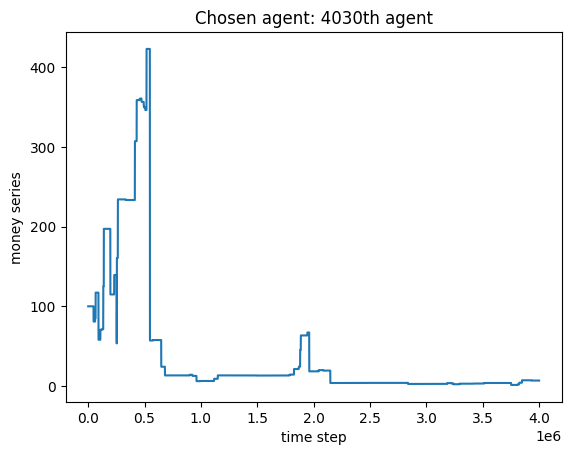

In [24]:
plt.plot(m_series)
plt.xlabel("time step")
plt.ylabel("money series")
plt.title(f"Chosen agent: {chosen_agent_idx+1}th agent")
plt.show()

### Modificación del primer modelo YS: simulaciones

Veamos ahora qué resultado tendría una simulación de nuestro primer modelo si introducimos un sesgo a favor del agente más pobre en cada transacción:

* Si el agente perdedor es el agente más pobre ($m_{i} = m_{min}$), y este agente va a tener que hacer un desembolso positivo ($\alpha > 0$), entonces la fracción transferida va a ser menor, es decir, se va a actualizar $\alpha$ antes de la transferencia multiplicándola por una fracción positiva menor a uno.
* De otro modo, es decir, si el agente perdedor es el agente más rico ($m_{j} = m_{min}$), o bien este agente va a tener que hacer un desembolso negativo ($\alpha < 0$), entonces la fracción transferida se va a mantener igual.

Los parámetros para la simulación serán los mismos que en la simulación anterior.

In [25]:
from economic_agent import Agent_YS1st_biased
from random import randint,choice
import matplotlib.pyplot as plt
import numpy as np

In [26]:
# Parámetros
Nexp = 4
N = int(5*10**Nexp) # número de agentes

Mexp = 6
M = 5*10**Mexp # cantidad total de dinero en el sistema

T = M/N # temperatura de dinero

texp = 6 # Se recomienda 5
t_steps = int(4*10**texp) # Pasos de tiempo para la simulación

In [27]:
# Se crean a los agentes
agents_list = [Agent_YS1st_biased(money=T) for i in range(N)] # Todos los agentes tienen la misma cantidad de dinero
chosen_agent_idx = choice(range(N)) # índice del agente elegido para ver cómo evoluciona su serie temporal de dinero
# Simulación
for i in range(t_steps):
    agent_i_index = randint(0,N-1)
    agent_j_index = randint(0,N-1) # se elige un par de agentes al azar para hacer transacción
    coin_flip = randint(0,1)
    loser_index = [agent_i_index,agent_j_index][coin_flip] # Uno de los agentes se selecciona al azar como el perdedor
    winner_index = [agent_i_index, agent_j_index][1-coin_flip]
    # El perdedor le paga al ganador
    agents_list[loser_index].pay(payee=agents_list[winner_index])

    agents_list[chosen_agent_idx].observe_money() # Se registra la cantidad de dinero del agente elegido en su serie temporal

In [28]:
# Datos para el histograma
final_m_array = np.array([agent.money for agent in agents_list])
nb_bins = int(max(final_m_array))

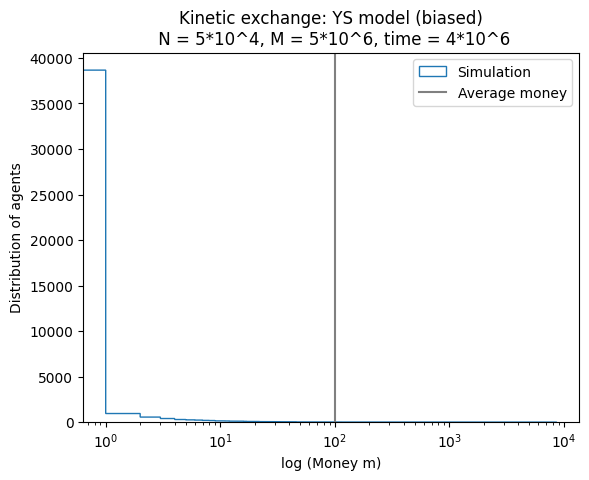

In [29]:
plt.hist(final_m_array, bins=range(nb_bins+2), density=False, label="Simulation", histtype='step')
plt.axvline(x=T, color = 'gray', label='Average money')
plt.title(f"Kinetic exchange: YS model (biased)\n N = 5*10^{Nexp}, M = 5*10^{Mexp}, time = 4*10^{texp}")
plt.xlabel("log (Money m)")
plt.ylabel("Distribution of agents")
plt.xscale('log')
#plt.yscale('log')
plt.legend()
plt.show()

Otra vez vemos que una fracción minúscula de agentes terminan como "oligarcas" que poseen prácticamente toda la riqueza de la economía simulada, y el resto terminan con prácticamente nada. La cantidad de dinero máxima que llega a poseer un agente en esta simulación es ahora de

In [32]:
print(int(max(final_m_array)))

8638


Por último, veamos la serie temporal de dinero $m\left(t\right)$ para el agente elegido,

In [8]:
m_series = agents_list[chosen_agent_idx].money_timeseries

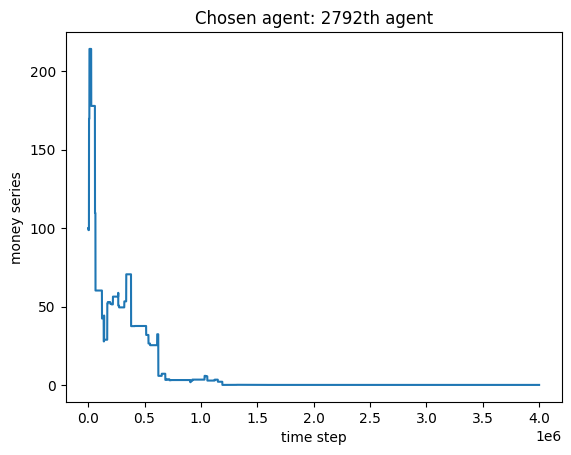

In [10]:
plt.plot(m_series)
plt.xlabel("time step")
plt.ylabel("money series")
plt.title(f"Chosen agent: {chosen_agent_idx+1}th agent")
plt.show()

Podemos extraer algunas conclusiones de estos resultados. No importa con cuánta riqueza empezaron los agentes. No importa que todos los lanzamientos de moneda fueran absolutamente justos. No importa que el resultado esperado del agente más pobre fuera positivo en cada transacción, mientras que el del agente más rico fuera negativo. Cualquier agente individual en esta economía podría haberse convertido en uno de los oligarcas; de hecho, todos tenían las mismas probabilidades si habían empezado con la misma riqueza. En ese sentido, había igualdad de oportunidades. Pero sólo unos cuantos de ellos se convirtieron en oligarcas, y todos los demás vieron cómo su riqueza media disminuía hacia cero a medida que realizaban más y más transacciones.